In [33]:
import pandas as pd
import numpy as naheemat
import nltk
import re 

In [34]:
data = pd.read_csv(r"C:\Users\ismai\Desktop\My_Files\Deep Learning\NLP\Uberreview1.csv")

In [35]:
data.head()

,Name,Date,Country,Review,Ratings
0,Daniel Williams,"Date of experience: September 30, 2023",United Kingdom,Uber are a great service.Like any company pron...,5
1,Nini,"Date of experience: September 17, 2023",Israel,You could be more accurate with the pick up lo...,5
2,Jeffrey Chambers,"Date of experience: September 27, 2023",United States,"I do not use Uber a lot, but when I do I usual...",5
3,sandra thomas,"Date of experience: September 23, 2023",United Kingdom,Well where do I start. This amazing uber drive...,5
4,Robyn,"Date of experience: September 25, 2023",Australia,I have recently joined Uber during a trip inte...,4


In [6]:
data["Ratings"].tolist()

[5,
 5,
 5,
 5,
 4,
 5,
 1,
 1,
 1,
 5,
 1,
 5,
 5,
 1,
 5,
 2,
 4,
 1,
 4,
 1,
 1,
 2,
 5,
 5,
 1,
 4,
 1,
 1,
 5,
 4,
 5,
 1,
 1,
 5,
 5,
 5,
 1,
 1,
 5,
 5,
 1,
 4,
 5,
 1,
 1,
 5,
 1,
 1,
 1,
 2,
 1,
 2,
 5,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 5,
 1,
 5,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 3,
 1,
 5,
 1,
 5,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 5,
 5,
 1,
 5,
 5,
 5,
 1,
 1,
 5,
 5,
 5,
 4,
 5,
 1,
 5,
 5,
 1,
 2,
 1,
 1,
 1,
 5,
 5,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 1,
 5,
 1,
 5,
 1,
 1,
 1,
 1,
 5,
 1,
 5,
 5,
 1,
 1,
 5,
 5,
 5,
 1,
 1,
 1,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 1,
 1,
 5,
 1,
 1,
 5,
 1,
 5,
 4,
 5,
 1,
 1,
 5,
 1,
 1,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 1,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 5,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 5,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,


In [36]:
def review(value):
    if 1<=value<=2:
        return 0
    elif 3<=value<=5:
        return 1
data["Sentiments"]=data["Ratings"].apply(review)

In [37]:
data.head(10)

,Name,Date,Country,Review,Ratings,Sentiments
0,Daniel Williams,"Date of experience: September 30, 2023",United Kingdom,Uber are a great service.Like any company pron...,5,1
1,Nini,"Date of experience: September 17, 2023",Israel,You could be more accurate with the pick up lo...,5,1
2,Jeffrey Chambers,"Date of experience: September 27, 2023",United States,"I do not use Uber a lot, but when I do I usual...",5,1
3,sandra thomas,"Date of experience: September 23, 2023",United Kingdom,Well where do I start. This amazing uber drive...,5,1
4,Robyn,"Date of experience: September 25, 2023",Australia,I have recently joined Uber during a trip inte...,4,1
5,Ian Howell,"Date of experience: September 25, 2023",Australia,Have to admit that previous exposures to Uber ...,5,1
6,Chris,"Date of experience: September 29, 2023",United States,I've called time and time again to get informa...,1,0
7,Daniel,"Date of experience: September 21, 2023",United Kingdom,My wife was quoted £24 for a trip to see our m...,1,0
8,Mr Dair,"Date of experience: September 30, 2023",United Kingdom,"I have to say, Uber has the worst customer ser...",1,0
9,Valued Customer,"Date of experience: September 27, 2023",United States,The driver was on time for a reserved time. He...,5,1


In [38]:
def text_preprocess(doc):
    doc = doc.lower()
    doc = doc.replace('.',". ")
    doc = doc.replace(',',", ")
    doc = doc.replace('!',"! ")
    doc = re.sub(r"[^a-z\s]","",doc)
    doc = [d for d in doc.split() if d not in stopwords]
    doc = " ".join(doc)
    return doc 

In [39]:
data.Review.apply(text_preprocess)

0        uber great service like company prone odd hicc...
1        could accurate pick location also drivers canc...
2        use uber lot usually use multiple times period...
3        well start amazing uber driver drove us home e...
4        recently joined uber trip interstate family we...
                               ...                        
15298        id name first born son uber service great use
15299    honestly combining best technology something n...
15300    helpful website looking travel clearance covid...
15301    used uber visting mom manchester england quick...
15302    living ny youre greeted tons transportation al...
Name: Review, Length: 15303, dtype: object

In [41]:
data["Cleaned_review"]=data.Review.apply(text_preprocess)

In [42]:
data

,Name,Date,Country,Review,Ratings,Sentiments,Cleaned_review
0,Daniel Williams,"Date of experience: September 30, 2023",United Kingdom,Uber are a great service.Like any company pron...,5,1,uber great service like company prone odd hicc...
1,Nini,"Date of experience: September 17, 2023",Israel,You could be more accurate with the pick up lo...,5,1,could accurate pick location also drivers canc...
2,Jeffrey Chambers,"Date of experience: September 27, 2023",United States,"I do not use Uber a lot, but when I do I usual...",5,1,use uber lot usually use multiple times period...
3,sandra thomas,"Date of experience: September 23, 2023",United Kingdom,Well where do I start. This amazing uber drive...,5,1,well start amazing uber driver drove us home e...
4,Robyn,"Date of experience: September 25, 2023",Australia,I have recently joined Uber during a trip inte...,4,1,recently joined uber trip interstate family we...
...,...,...,...,...,...,...,...
15298,Buzz Mathew,"Date of experience: June 28, 2014",United States,"I'd name my first born son Uber, the service w...",5,1,id name first born son uber service great use
15299,ryan chen,"Date of experience: June 27, 2014",United States,honestly combining the best of technology with...,5,1,honestly combining best technology something n...
15300,Marc,"Date of experience: February 21, 2022",United States,Very helpful website. Was looking for a travel...,5,1,helpful website looking travel clearance covid...
15301,Monesh Manglani,"Date of experience: June 27, 2014",United Kingdom,I used Uber while visting my mom in Manchester...,5,1,used uber visting mom manchester england quick...


In [43]:
X=data["Cleaned_review"]
y=data["Sentiments"]

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [45]:
Vectorizer = TfidfVectorizer()

In [46]:
Vectorizer.fit(X)

TfidfVectorizer()

In [47]:
X = Vectorizer.transform(X)

In [48]:
X

<15303x24403 sparse matrix of type '<class 'numpy.float64'>'
	with 376245 stored elements in Compressed Sparse Row format>

In [49]:
Vectorizer.get_feature_names_out(X)

array(['aa', 'aace', 'aad', ..., 'zwlquosei', 'zwroty', 'zwy'],
      dtype=object)

In [50]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
from sklearn.model_selection import train_test_split 


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
print(X_train)

  (0, 24068)	0.0807383817068618
  (0, 24036)	0.15621566445218682
  (0, 23545)	0.13464577820986756
  (0, 22128)	0.2058452400235692
  (0, 21595)	0.06369265099889214
  (0, 21545)	0.2535847246232638
  (0, 20006)	0.2535847246232638
  (0, 19426)	0.15765698331849315
  (0, 19045)	0.15765698331849315
  (0, 18654)	0.2535847246232638
  (0, 18415)	0.1419829819148839
  (0, 16660)	0.21522389749835513
  (0, 16019)	0.2535847246232638
  (0, 15664)	0.09771445983990164
  (0, 13872)	0.2255651053049859
  (0, 11434)	0.13513159397698069
  (0, 9200)	0.16606596903777202
  (0, 8442)	0.1730668286369462
  (0, 8108)	0.2535847246232638
  (0, 6156)	0.13953755983978128
  (0, 5357)	0.2535847246232638
  (0, 4164)	0.17593552973360352
  (0, 2667)	0.2058452400235692
  (0, 1858)	0.23590631311161672
  (0, 1079)	0.16277192876907062
  :	:
  (10709, 1482)	0.11372470941542791
  (10709, 1481)	0.10691197256472747
  (10709, 1030)	0.16517406415403318
  (10709, 265)	0.08434916559374006
  (10709, 92)	0.07891593717605212
  (10709, 91)

In [56]:
from sklearn.linear_model import LogisticRegression
lr_model =  LogisticRegression()

In [57]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [58]:
y_predict = lr_model.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
accuracy_score(y_test,y_predict)

0.9026355913744283

In [62]:
data_test = pd.DataFrame({"Review":data.Review.iloc[y_test.index],"True_Sentiment":y_test,"Predicted_Sentiment":y_predict})
data_test["Predicted_label"] = data_test["Predicted_Sentiment"].map({1:"Positive",0:"Negative"})
data_test["True_label"] = data_test["True_Sentiment"].map({1:"Positive",0:"Negative"})

In [64]:
data_test

,Review,True_Sentiment,Predicted_Sentiment,Predicted_label,True_label
12099,Walgreens must have changed their app and you ...,1,0,Negative,Positive
10072,Elizabeth Line is awful seats uncomfortable no...,0,1,Positive,Negative
4397,My driver was very friendly and professional. ...,1,1,Positive,Positive
3477,"Very friendly, polite driver. Very efficient.",1,1,Positive,Positive
12885,I always use Uber for a night out and never ha...,1,0,Negative,Positive
...,...,...,...,...,...
12546,Im surprised there are so many bad reviews. I ...,1,1,Positive,Positive
3353,Great trip. Driver was able to provide good c...,1,1,Positive,Positive
4308,Uber is the worst app and it has the worst cus...,0,0,Negative,Negative
1758,"Great drivers. Prompt, friendly and trustworthy.",1,1,Positive,Positive


In [66]:
Negative_reviews = data_test[data_test["Predicted_label"]=="Negative"]
Positive_reviews = data_test[data_test["Predicted_label"]=="Positive"]

In [67]:
Negative_reviews

,Review,True_Sentiment,Predicted_Sentiment,Predicted_label,True_label
12099,Walgreens must have changed their app and you ...,1,0,Negative,Positive
12885,I always use Uber for a night out and never ha...,1,0,Negative,Positive
14776,Range Rover sport. The worst car I’ve ever dri...,0,0,Negative,Negative
9513,I would leave 0 stars this company is absolute...,0,0,Negative,Negative
12252,Only leaving a star because you have to. My hu...,0,0,Negative,Negative
...,...,...,...,...,...
8723,"The drivers were nice, and I would have given ...",0,0,Negative,Negative
3132,AVOID.Very dubious pricing! One price by e mai...,0,0,Negative,Negative
6733,DISHONEST COMPANY. Falsely claiming on ebay th...,0,0,Negative,Negative
4308,Uber is the worst app and it has the worst cus...,0,0,Negative,Negative


In [68]:
Positive_reviews

,Review,True_Sentiment,Predicted_Sentiment,Predicted_label,True_label
10072,Elizabeth Line is awful seats uncomfortable no...,0,1,Positive,Negative
4397,My driver was very friendly and professional. ...,1,1,Positive,Positive
3477,"Very friendly, polite driver. Very efficient.",1,1,Positive,Positive
8146,Great driver. Very polite and safe driver,1,1,Positive,Positive
2323,We needed transport and food in remote-ish are...,1,1,Positive,Positive
...,...,...,...,...,...
2588,All my rides have been nothing but good and dr...,1,1,Positive,Positive
3338,This was very user friendly and easy to help s...,1,1,Positive,Positive
12546,Im surprised there are so many bad reviews. I ...,1,1,Positive,Positive
3353,Great trip. Driver was able to provide good c...,1,1,Positive,Positive


In [69]:
print(f"Positive_review:{Positive_reviews.value_counts().sum()},Negative_review:{Negative_reviews.value_counts().sum()}")

Positive_review:2201,Negative_review:2390


In [74]:
True_Negative_reviews = data_test[data_test["True_label"]=="Negative"]
True_Positive_reviews = data_test[data_test["True_label"]=="Positive"]

In [75]:
print(f"True_Positive_review:{True_Positive_reviews.value_counts().sum()},True_Negative_review:{True_Negative_reviews.value_counts().sum()}")

True_Positive_review:2352,True_Negative_review:2239


In [77]:
sentiment_distribution = data_test['Predicted_label'].value_counts(normalize=True)*100
print(sentiment_distribution)

Negative    52.058375
Positive    47.941625
Name: Predicted_label, dtype: float64


In [79]:
True_sentiment_distribution = data_test['True_label'].value_counts(normalize=True)*100
print(True_sentiment_distribution)

Positive    51.230669
Negative    48.769331
Name: True_label, dtype: float64


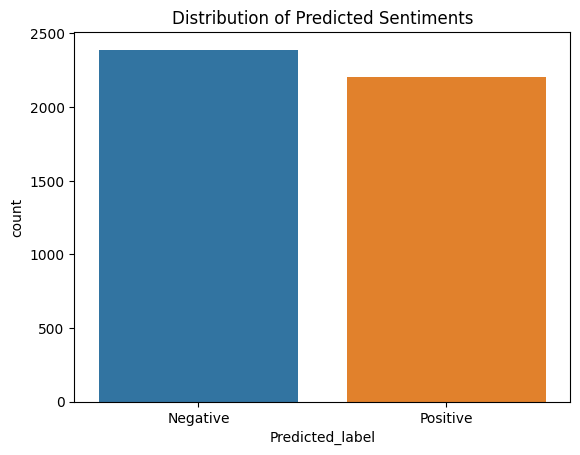

In [81]:
import seaborn as sns

# Plot the distribution of sentiments
sns.countplot(x='Predicted_label', data=data_test)
plt.title('Distribution of Predicted Sentiments')
plt.show()

In [82]:
import joblib

joblib.dump(lr_model, 'Uber_model.pkl')
joblib.dump(Vectorizer, 'Uber_vectorizer.pkl')

['Uber_vectorizer.pkl']

In [12]:
import  pandas as pd

data=pd.DataFrame({"Negative_review":"A"},index=[i for i in range(20)])

In [18]:
Neg_df = pd.read_csv(r"C:\Users\ismai\Desktop\My_Files\Deep Learning\NLP\Negative_reviews")

In [21]:
Neg_df.drop("Review",axis=1)

,Negative Reviews
0,I got charged $35 for a 3.7 mile ride. A regul...
1,call only Uber and its customers. Drivers are ...
2,Driver had no clue where to go. Waited for him...
